**By Kurosh Karimi**

## HR Data


We have a five csv files related to HR Data priject. These tables store information about Employees, Jobs, Job History, departments and Locations without headers that are attached to this directory.

## Task:

1. Create a Sqlite database instance, named "HR", and connect to it.
2. Create five empty tables with the following headers:


Employee:
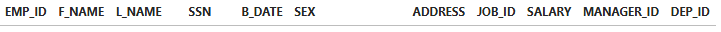




JobsHistory:




Jobs:





Departments:





Locations:




3) Add the csv files to their relevant tables defined above, and show them.
4)  Write a query to find the average salary of the five least-earning employees.
5) Write a query to find the records of employees older than the average age of all employees.
6) From the Job_History table, display the list of Employee IDs, years of service, and average years of service for all entries.
7) Retrieve only the list of employees whose JOB_TITLE is Jr. Designer (use either subquery or implicit join).
8) Retrieve JOB information and a list of employees whose birth year is after 1976 (use implicit join).

1 and 2. Creating a Sqlite database instance, named "HR", connecting to it and creating empty tables

In [1]:
# !pip install ipython-sql
# !pip install pandas

In [30]:
import pandas as pd
import sqlite3
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [3]:
Employees = pd.read_csv('Employees.csv', header = None)
JobsHistory = pd.read_csv('JobsHistory.csv', header = None)
Jobs = pd.read_csv('Jobs.csv', header = None)
Departments = pd.read_csv('Departments.csv', header = None)
Locations = pd.read_csv('Locations.csv', header = None)


In [4]:
# Create a connection to the SQLite database
con = sqlite3.connect('HR.db')

In [5]:
%%sql 
sqlite:///HR.db

DROP TABLE IF EXISTS EMPLOYEES;
CREATE TABLE EMPLOYEES (
                            EMP_ID CHAR(9) NOT NULL, 
                            F_NAME VARCHAR(15) NOT NULL,
                            L_NAME VARCHAR(15) NOT NULL,
                            SSN CHAR(9),
                            B_DATE DATE,
                            SEX CHAR,
                            ADDRESS VARCHAR(30),
                            JOB_ID CHAR(9),
                            SALARY DECIMAL(10,2),
                            MANAGER_ID CHAR(9),
                            DEP_ID CHAR(9) NOT NULL,
                            PRIMARY KEY (EMP_ID));
DROP TABLE IF EXISTS JOB_HISTORY;
  CREATE TABLE JOB_HISTORY (
                            EMPL_ID CHAR(9) NOT NULL, 
                            START_DATE DATE,
                            JOBS_ID CHAR(9) NOT NULL,
                            DEPT_ID CHAR(9),
                            PRIMARY KEY (EMPL_ID,JOBS_ID));

DROP TABLE IF EXISTS JOBS;                            
 CREATE TABLE JOBS (
                            JOB_IDENT CHAR(9) NOT NULL, 
                            JOB_TITLE VARCHAR(30),
                            MIN_SALARY DECIMAL(10,2),
                            MAX_SALARY DECIMAL(10,2),
                            PRIMARY KEY (JOB_IDENT));

DROP TABLE IF EXISTS DEPARTMENTS;
CREATE TABLE DEPARTMENTS (
                            DEPT_ID_DEP CHAR(9) NOT NULL, 
                            DEP_NAME VARCHAR(15) ,
                            MANAGER_ID CHAR(9),
                            LOC_ID CHAR(9),
                            PRIMARY KEY (DEPT_ID_DEP));

DROP TABLE IF EXISTS LOCATIONS;
CREATE TABLE LOCATIONS (
                            LOCT_ID CHAR(9) NOT NULL,
                            DEP_ID_LOC CHAR(9) NOT NULL,
                            PRIMARY KEY (LOCT_ID,DEP_ID_LOC));


Done.
Done.
Done.
Done.
Done.
Done.
Done.
Done.
Done.
Done.


[]

3. Add the csv files to their relevant tables defined above and show them.

In [6]:
emp_headers = pd.read_sql('SELECT * FROM EMPLOYEES', con)
Employees.columns = emp_headers.columns.to_list()

job_hist_headers = pd.read_sql('SELECT * FROM JOB_HISTORY', con)
JobsHistory.columns = job_hist_headers.columns.to_list()

jobs_headers = pd.read_sql('SELECT * FROM JOBS', con)
Jobs.columns = jobs_headers.columns.to_list()

dep_headers = pd.read_sql('SELECT * FROM DEPARTMENTS', con)
Departments.columns = dep_headers.columns.to_list()

loc_headers = pd.read_sql('SELECT * FROM LOCATIONS', con)
Locations.columns = loc_headers.columns.to_list()

In [7]:
# Insert the DataFrame into the database. This will automatically create the table.
Employees.to_sql('EMPLOYEES', con, if_exists='replace', index=False, method='multi')
JobsHistory.to_sql('JOB_HISTORY', con, if_exists='replace', index=False, method='multi')
Jobs.to_sql('JOBS', con, if_exists='replace', index=False, method='multi')
Departments.to_sql('DEPARTMENTS', con, if_exists='replace', index=False, method='multi')
Locations.to_sql('LOCATIONS', con, if_exists='replace', index=False, method='multi')

con.close()

In [8]:
%%sql
SELECT * FROM EMPLOYEES;

 * sqlite:///HR.db
Done.


EMP_ID,F_NAME,L_NAME,SSN,B_DATE,SEX,ADDRESS,JOB_ID,SALARY,MANAGER_ID,DEP_ID
E1001,John,Thomas,123456,1976-09-01,M,"5631 Rice, OakPark,IL",100,100000,30001,2
E1002,Alice,James,123457,1972-07-31,F,"980 Berry ln, Elgin,IL",200,80000,30002,5
E1003,Steve,Wells,123458,1980-10-08,M,"291 Springs, Gary,IL",300,50000,30002,5
E1004,Santosh,Kumar,123459,1985-07-20,M,"511 Aurora Av, Aurora,IL",400,60000,30002,5
E1005,Ahmed,Hussain,123410,1981-04-01,M,"216 Oak Tree, Geneva,IL",500,70000,30001,2
E1006,Nancy,Allen,123411,1978-06-02,F,"111 Green Pl, Elgin,IL",600,90000,30001,2
E1007,Mary,Thomas,123412,1975-05-05,F,"100 Rose Pl, Gary,IL",650,65000,30003,7
E1008,Bharath,Gupta,123413,1985-06-05,M,"145 Berry Ln, Naperville,IL",660,65000,30003,7
E1009,Andrea,Jones,123414,1990-09-07,F,"120 Fall Creek, Gary,IL",234,70000,30003,7
E1010,Ann,Jacob,123415,1982-03-30,F,"111 Britany Springs,Elgin,IL",220,70000,30002,5


In [9]:
%%sql
SELECT * FROM JOB_HISTORY;

 * sqlite:///HR.db
Done.


EMPL_ID,START_DATE,JOBS_ID,DEPT_ID
E1001,2000-08-01,100,2
E1002,2001-08-01,200,5
E1003,2001-08-16,300,5
E1004,2000-08-16,400,5
E1005,2000-05-30,500,2
E1006,2001-08-16,600,2
E1007,2002-05-30,650,7
E1008,2010-05-06,660,7
E1009,2016-08-16,234,7
E1010,2016-08-16,220,5


In [10]:
%%sql
SELECT * FROM JOBS;

 * sqlite:///HR.db
Done.


JOB_IDENT,JOB_TITLE,MIN_SALARY,MAX_SALARY
100,Sr. Architect,60000,100000
200,Sr. Software Developer,60000,80000
300,Jr.Software Developer,40000,60000
400,Jr.Software Developer,40000,60000
500,Jr. Architect,50000,70000
600,Lead Architect,70000,100000
650,Jr. Designer,60000,70000
660,Jr. Designer,60000,70000
234,Sr. Designer,70000,90000
220,Sr. Designer,70000,90000


In [11]:
%%sql
SELECT * FROM DEPARTMENTS;

 * sqlite:///HR.db
Done.


DEPT_ID_DEP,DEP_NAME,MANAGER_ID,LOC_ID
2,Architect Group,30001,L0001
5,Software Group,30002,L0002
7,Design Team,30003,L0003
5,Software Group,30004,L0004


In [12]:
%%sql
SELECT * FROM LOCATIONS;

 * sqlite:///HR.db
Done.


LOCT_ID,DEP_ID_LOC
L0001,2
L0002,5
L0003,7


4. Write a query to find the average salary of the five least-earning employees.

In [18]:
%%sql

SELECT AVG(SALARY) AS AVG_SALARY FROM 
(SELECT SALARY FROM EMPLOYEES ORDER BY SALARY ASC LIMIT 5)


 * sqlite:///HR.db
Done.


AVG_SALARY
62000.0


5. Write a query to find the records of employees older than the average age of all employees.

In [19]:
%%sql

SELECT * FROM EMPLOYEES
WHERE (CAST(strftime('%Y', 'now') AS INTEGER) - CAST(strftime('%Y', B_DATE) AS INTEGER)) >
(SELECT AVG(CAST(strftime('%Y', 'now') AS INTEGER) - CAST(strftime('%Y', B_DATE) AS INTEGER)) FROM EMPLOYEES);


 * sqlite:///HR.db
Done.


EMP_ID,F_NAME,L_NAME,SSN,B_DATE,SEX,ADDRESS,JOB_ID,SALARY,MANAGER_ID,DEP_ID
E1001,John,Thomas,123456,1976-09-01,M,"5631 Rice, OakPark,IL",100,100000,30001,2
E1002,Alice,James,123457,1972-07-31,F,"980 Berry ln, Elgin,IL",200,80000,30002,5
E1003,Steve,Wells,123458,1980-10-08,M,"291 Springs, Gary,IL",300,50000,30002,5
E1006,Nancy,Allen,123411,1978-06-02,F,"111 Green Pl, Elgin,IL",600,90000,30001,2
E1007,Mary,Thomas,123412,1975-05-05,F,"100 Rose Pl, Gary,IL",650,65000,30003,7


6. From the Job_History table, display the list of Employee IDs, years of service, and average years of service for all entries.


In [20]:
%%sql

SELECT EMPL_ID, 
       (CAST(strftime('%Y', 'now') AS INTEGER) - CAST(strftime('%Y', START_DATE) AS INTEGER)) AS YEARS_OF_SERVICE,
       (SELECT AVG(CAST(strftime('%Y', 'now') AS INTEGER) - CAST(strftime('%Y', START_DATE) AS INTEGER)) FROM JOB_HISTORY) AS AVG_YEARS_OF_SERVICE
FROM JOB_HISTORY;


 * sqlite:///HR.db
Done.


EMPL_ID,YEARS_OF_SERVICE,AVG_YEARS_OF_SERVICE
E1001,24,19.3
E1002,23,19.3
E1003,23,19.3
E1004,24,19.3
E1005,24,19.3
E1006,23,19.3
E1007,22,19.3
E1008,14,19.3
E1009,8,19.3
E1010,8,19.3


7. Retrieve only the list of employees whose JOB_TITLE is Jr. Designer.

In [ ]:
# solution1 : using implicit join

In [55]:
%%sql

SELECT E.JOB_ID, E.F_NAME, E.L_NAME FROM EMPLOYEES E,  JOBS J
WHERE E.JOB_ID = J.JOB_IDENT
AND
J.JOB_TITLE= 'Jr. Designer';

 * sqlite:///HR.db
Done.


JOB_ID,F_NAME,L_NAME
650,Mary,Thomas
660,Bharath,Gupta


In [ ]:
# solution2: using sub-queries

In [56]:
%%sql

SELECT JOB_ID, F_NAME, L_NAME FROM EMPLOYEES 
WHERE JOB_ID
IN
(SELECT JOB_IDENT FROM JOBS WHERE JOB_TITLE = 'Jr. Designer');

 * sqlite:///HR.db
Done.


JOB_ID,F_NAME,L_NAME
650,Mary,Thomas
660,Bharath,Gupta


8. Retrieve JOB information and a list of employees whose birth year is after 1976.

In [ ]:
# solution : using implicit join

In [63]:
%%sql

SELECT J.JOB_IDENT, J.JOB_TITLE, J.MIN_SALARY, J.MAX_SALARY, E.F_NAME, E.L_NAME, E.B_DATE FROM JOBS J, EMPLOYEES E
WHERE J.JOB_IDENT=E.JOB_ID 
AND
CAST(strftime('%Y', E.B_DATE) AS INTEGER)>1976;


 * sqlite:///HR.db
Done.


JOB_IDENT,JOB_TITLE,MIN_SALARY,MAX_SALARY,F_NAME,L_NAME,B_DATE
300,Jr.Software Developer,40000,60000,Steve,Wells,1980-10-08
400,Jr.Software Developer,40000,60000,Santosh,Kumar,1985-07-20
500,Jr. Architect,50000,70000,Ahmed,Hussain,1981-04-01
600,Lead Architect,70000,100000,Nancy,Allen,1978-06-02
660,Jr. Designer,60000,70000,Bharath,Gupta,1985-06-05
234,Sr. Designer,70000,90000,Andrea,Jones,1990-09-07
220,Sr. Designer,70000,90000,Ann,Jacob,1982-03-30
